## These recipes and the functions in the `rgb.py` file are largely based on the plotting and processing functions in Goes2Go and Satpy

In [1]:
from rgb import *
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
import plotly.express as px

import skimage.io as skio
import plotly.io as pio
pio.renderers.default = 'svg'

from glob import glob
import s3fs

In [2]:
# Get an ABI Dataset
FILE16 = 'aws_data/ida_hourly/OR_ABI-L2-MCMIPM1-M6_G16_s20212411400278_e20212411400347_c20212411400421.nc'
G16 = xr.open_dataset(FILE16)

## Matplotlib

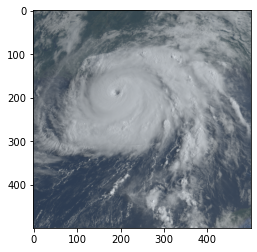

In [3]:
# Create RGB and plot
plt.imshow(G16.rgb.TrueColor())

In [13]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import re
import s3fs
import requests
import netCDF4

from rgb import *

storm_name = 'Hurricane Ida'

storm_dataset = pd.read_csv('storm_data.csv')

storm_list = storm_dataset['storm_name'].unique()
storm_list
# fs = s3fs.S3FileSystem(anon=True)


# df = storm_dataset[storm_dataset['storm_name'].eq(storm_name)].reset_index(drop=True)
# df
#fs = s3fs.S3FileSystem(anon=True) 
#f = fs.glob(f'{df.m1_combined}*.nc')[0]
#f
# key = f[12:]
# print(key)

# resp = requests.get(f'https://noaa-goes16.s3.amazonaws.com/{key}')
# file_name = key.split('/')[-1].split('.')[0]
# nc4_ds = netCDF4.Dataset(file_name, memory = resp.content)
# store = xr.backends.NetCDF4DataStore(nc4_ds)

# with xr.open_dataset(store) as ds:

#     img = df.m1_c13[25:40]
#     fig = px.imshow(img, animation_frame=0, binary_string=True)

array(['Hurricane Elsa', 'Hurricane Grace', 'Hurricane Nicholas',
       'Hurricane Sam'], dtype=object)

## Plotly Express

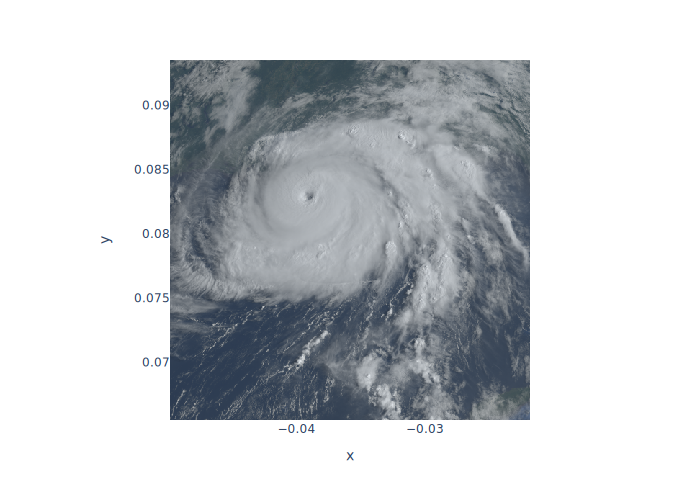

In [4]:
px.imshow(G16.rgb.TrueColor())


## Satpy pngs for Plotly 

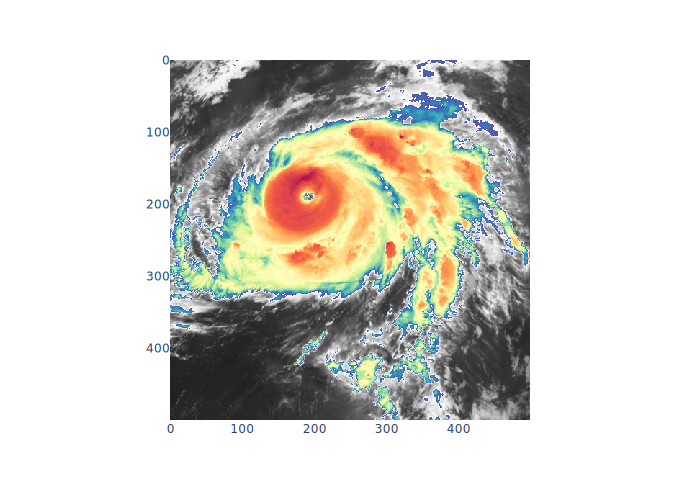

In [5]:
png = skio.imread('png/ida/colorized_ir_clouds/2021-29-Aug_UTC_1400.png')
px.imshow(png)

## Cartopy True Color

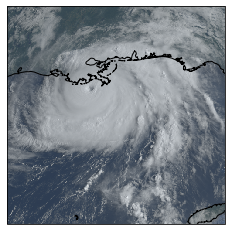

In [6]:
ax = plt.subplot(projection=G16.rgb.crs)
ax.imshow(G16.rgb.TrueColor(), **G16.rgb.imshow_kwargs)
ax.coastlines()

## RGB images from goes2go

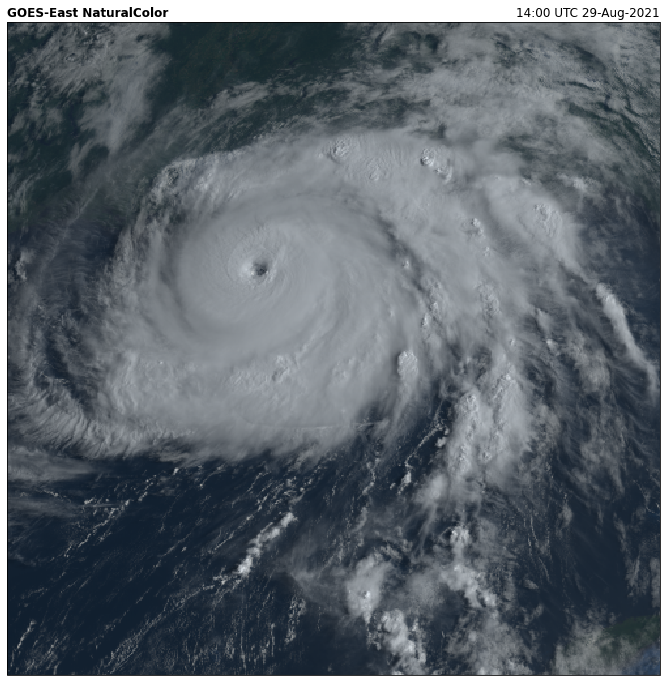

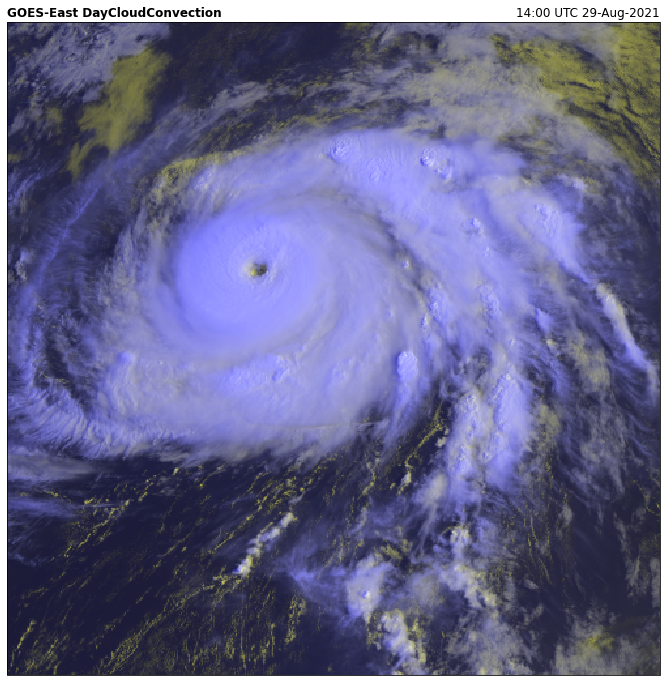

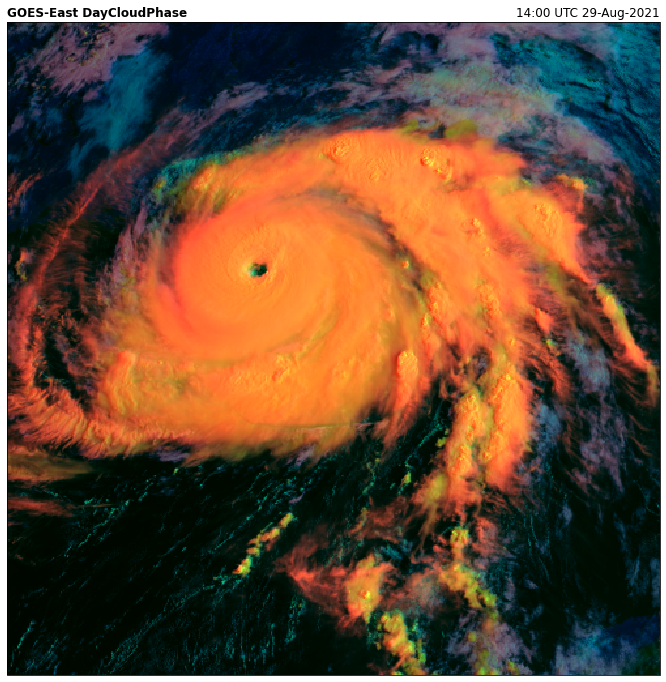

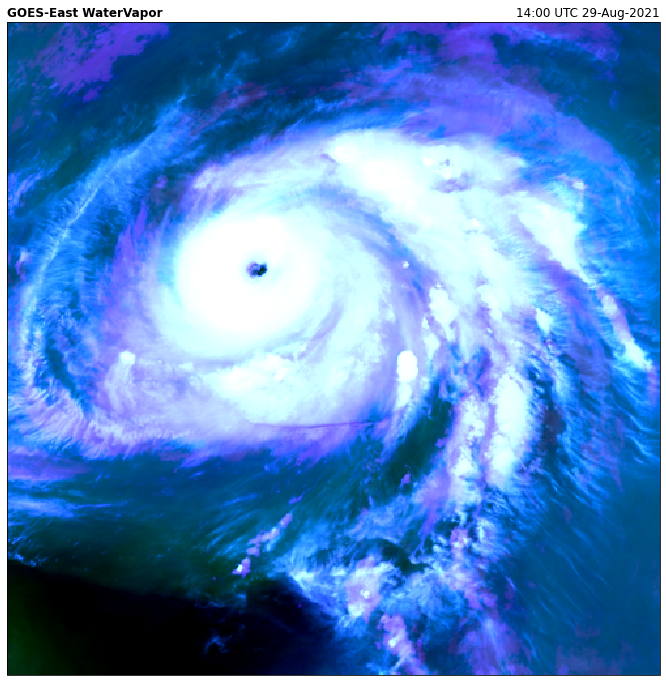

In [7]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Get an ABI Dataset
# FILE16 = 'aws_data/ida_hourly/OR_ABI-L2-MCMIPM1-M6_G16_s20212411400278_e20212411400347_c20212411400421.nc'
# G16 = xr.open_dataset(FILE16)

files = glob('aws_data/ida_hourly/*.nc')
#print(files)

rgb_products = ['NaturalColor', 'DayCloudConvection', 'DayCloudPhase','WaterVapor']

for product in rgb_products:

    fig = plt.figure(figsize=(15, 12))
    ax16 = fig.add_subplot(projection=G16.rgb.crs)

    for ax, G in zip([ax16], [G16]):
        RGB = getattr(G.rgb, product)()

        ax.imshow(RGB, **G.rgb.imshow_kwargs)
        ax.set_title(f"{G.orbital_slot} {product}", loc='left', fontweight='bold')
        ax.set_title(f"{G.t.dt.strftime('%H:%M UTC %d-%b-%Y').item()}", loc="right")
    plt.subplots_adjust(wspace=0.01)
    plt.savefig(f'png/ida/{product}/{G.t.dt.strftime("%Y-%d-%b_UTC_%H%M").item()}', bbox_inches='tight')

## Display only using Plotly

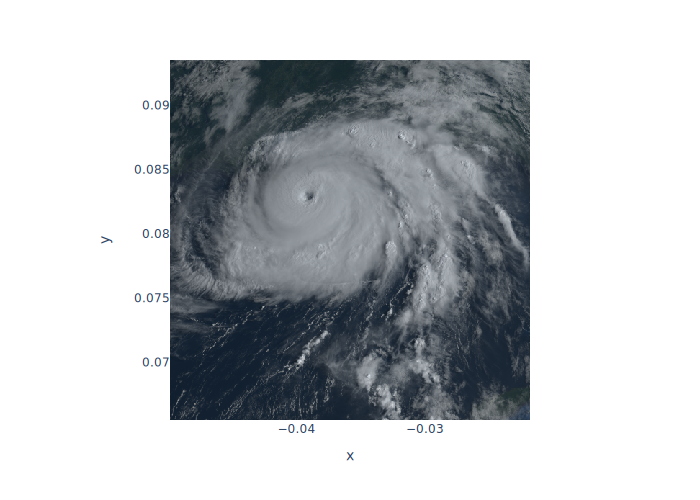

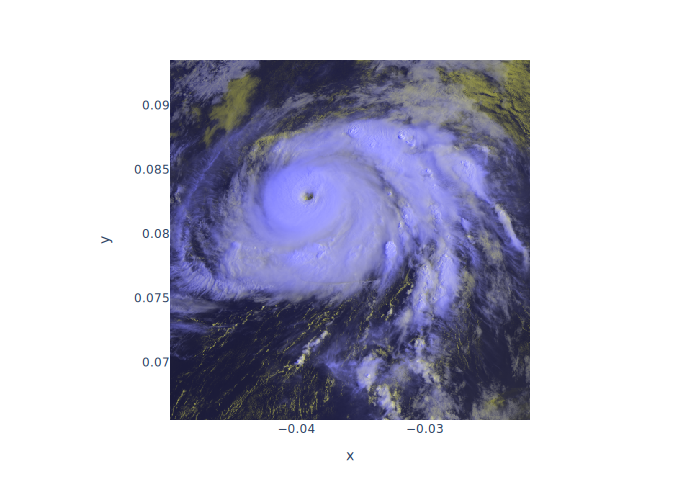

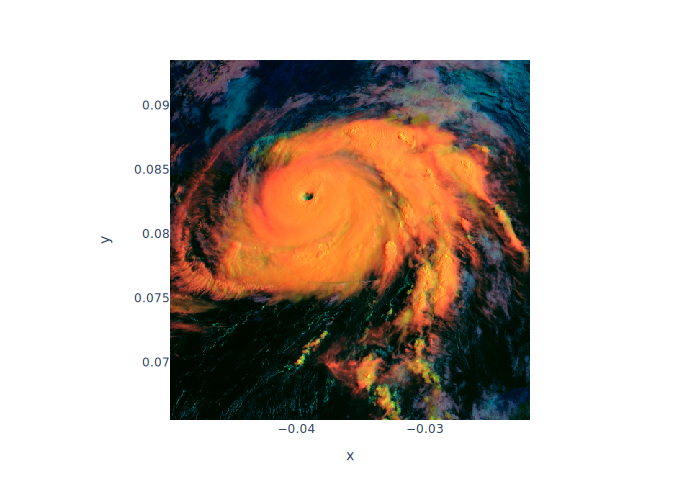

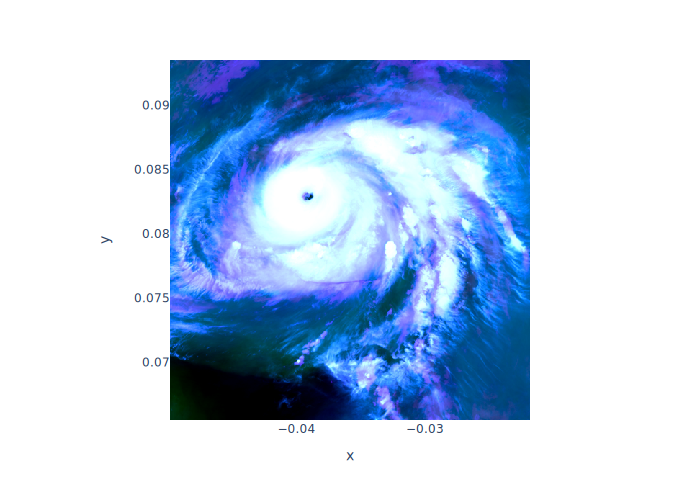

In [8]:
for product in rgb_products:
    RGB = getattr(G16.rgb, product)()

    a = px.imshow(RGB)
    a.show()

## Facet plot with Plotly

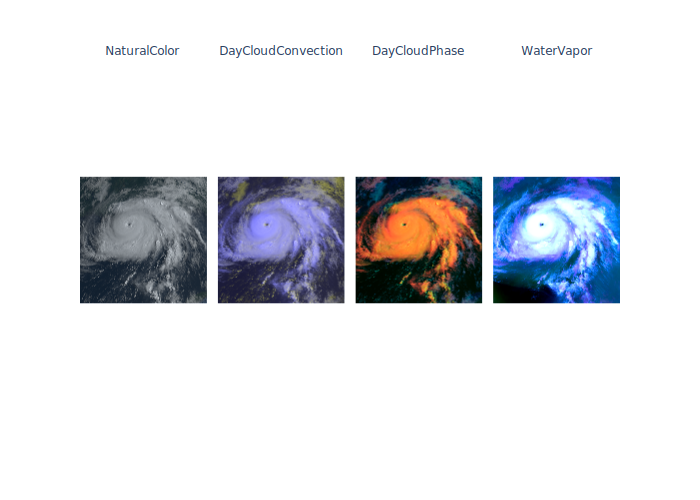

In [9]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Get an ABI Dataset
file = 'aws_data/ida_hourly/OR_ABI-L2-MCMIPM1-M6_G16_s20212411400278_e20212411400347_c20212411400421.nc'
G16 = xr.open_dataset(file)

products = ['NaturalColor', 'DayCloudConvection', 'DayCloudPhase','WaterVapor']

RGB = [getattr(G16.rgb, product)() for product in products]

fig = px.imshow(np.array(RGB), facet_col=0)
#Set facet titles
for i, product in enumerate(products):
    fig.layout.annotations[i]['text'] = f'{product}' 

fig.update_yaxes(showticklabels=False).update_xaxes(showticklabels=False)
fig.show()


## Get RGB png images from satpy

In [10]:
# from satpy import Scene
# from glob import glob

# rgb_scenes = ['colorized_ir_clouds', 'highlight_C14', 'C13']

# for line in open('csv/ana_times.csv'):
#     result = line.split(',')
#     #print(result)
    
#     for r in result:
#         filenames = glob(f'aws_data/ana_channels/*{r}*.nc')
#         #print(filenames)
#         scn = Scene(reader='abi_l1b', filenames=filenames)
#         # scn.available_composite_names()
#         scn.load(rgb_scenes)
#         scn.save_datasets(writer='cf', datasets=['colorized_ir_clouds', 'C13'], filename='netcdf/ana/{name}/{start_time:%Y-%d-%b_UTC_%H%M}.nc',
#                       exclude_attrs=['raw_metadata'])

#         for scene in rgb_scenes:
#             #print(f'{start_time:%Y-%d-%b_UTC_%H%M}')
#             scn.load([scene]) 
#             scn2 = scn.resample(resampler='native')
#             #scn2.show(scene) 
#             scn2.save_dataset(scene, filename='png/ana/{name}/{start_time:%Y-%d-%b_UTC_%H%M}.png')

            

## Gamma correction comparison

In [11]:
# Initialize s3 client with s3fs
fs = s3fs.S3FileSystem(anon=True)

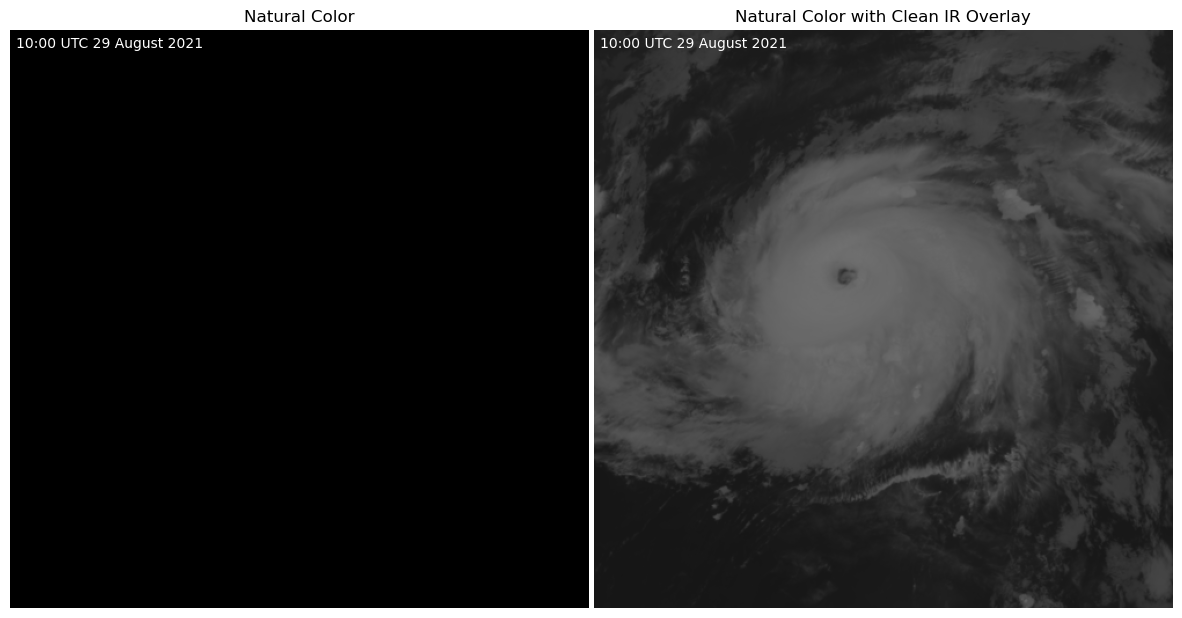

In [12]:
# Get an ABI Dataset
f = 'OR_ABI-L2-MCMIPM1-M6_G16_s20212411000278_e20212411000335_c20212411000422.nc'
daynight = fs.open(f"s3://noaa-goes16/ABI-L2-MCMIPM/2021/241/10/{f}")
fdn = xr.open_dataset(daynight)

nc = fdn.rgb.NaturalColor()
ncIR = fdn.rgb.NaturalColor(night_IR=True, gamma=1.2)

fig, axes = plt.subplots(1, 2, figsize=[15,8], dpi=100)

text = fdn.t.dt.strftime('%H:%M UTC %d %B %Y').item()

axes[0].axis('off')
axes[0].imshow(nc)
axes[0].set_title('Natural Color')
axes[0].text(0.01, .97, text, color='w', transform=axes[0].transAxes)

axes[1].axis('off')
axes[1].imshow(ncIR)
axes[1].set_title('Natural Color with Clean IR Overlay')
axes[1].text(0.01, .97, text, color='w', transform=axes[1].transAxes)

plt.subplots_adjust(wspace=.01)


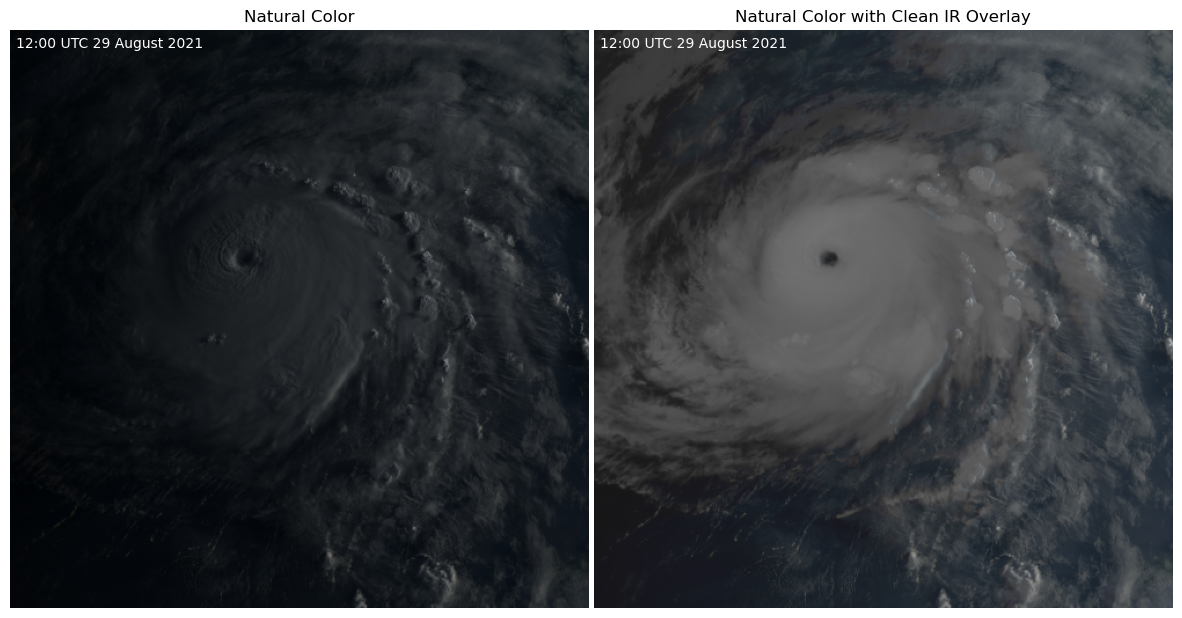

In [13]:
# Get an ABI Dataset
f = 'OR_ABI-L2-MCMIPM1-M6_G16_s20212411200278_e20212411200341_c20212411200420.nc'
daynight = fs.open(f"s3://noaa-goes16/ABI-L2-MCMIPM/2021/241/12/{f}")
fdn = xr.open_dataset(daynight)

nc = fdn.rgb.NaturalColor()
ncIR = fdn.rgb.NaturalColor(night_IR=True, gamma=1.2)

fig, axes = plt.subplots(1, 2, figsize=[15,8], dpi=100)

text = fdn.t.dt.strftime('%H:%M UTC %d %B %Y').item()

axes[0].axis('off')
axes[0].imshow(nc)
axes[0].set_title('Natural Color')
axes[0].text(0.01, .97, text, color='w', transform=axes[0].transAxes)

axes[1].axis('off')
axes[1].imshow(ncIR)
axes[1].set_title('Natural Color with Clean IR Overlay')
axes[1].text(0.01, .97, text, color='w', transform=axes[1].transAxes)

plt.subplots_adjust(wspace=.01)



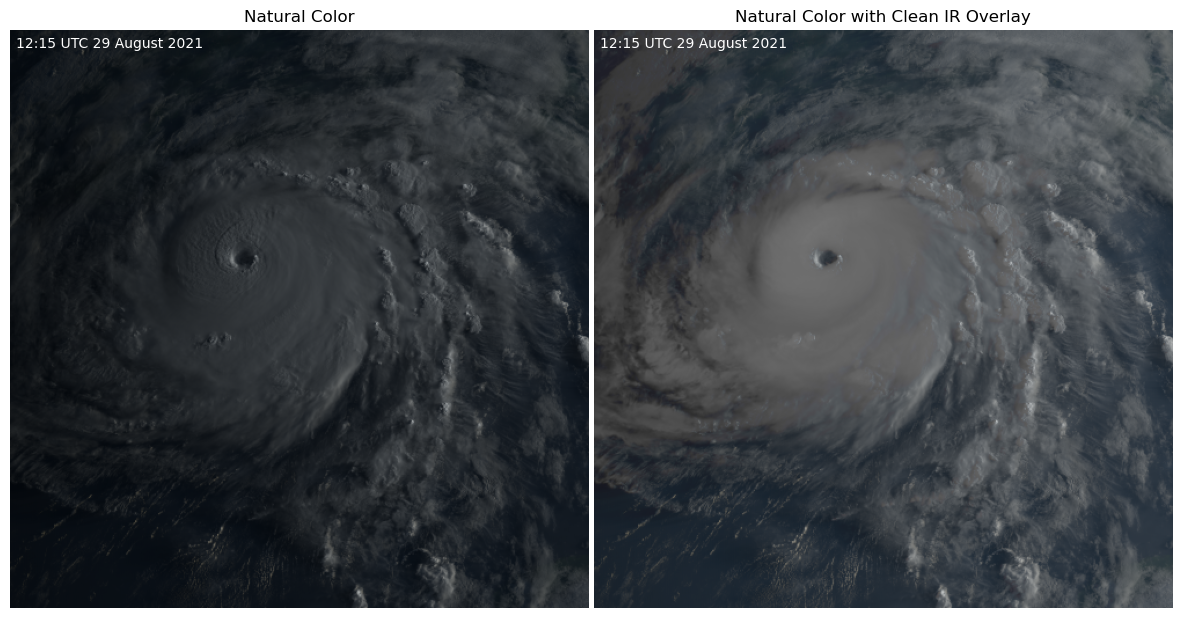

In [14]:
# Get an ABI Dataset
f = 'OR_ABI-L2-MCMIPM1-M6_G16_s20212411215249_e20212411215312_c20212411215395.nc'
daynight = fs.open(f"s3://noaa-goes16/ABI-L2-MCMIPM/2021/241/12/{f}")
fdn = xr.open_dataset(daynight)

nc = fdn.rgb.NaturalColor()
ncIR = fdn.rgb.NaturalColor(night_IR=True, gamma=1.2)

fig, axes = plt.subplots(1, 2, figsize=[15,8], dpi=100)

text = fdn.t.dt.strftime('%H:%M UTC %d %B %Y').item()

axes[0].axis('off')
axes[0].imshow(nc)
axes[0].set_title('Natural Color')
axes[0].text(0.01, .97, text, color='w', transform=axes[0].transAxes)

axes[1].axis('off')
axes[1].imshow(ncIR)
axes[1].set_title('Natural Color with Clean IR Overlay')
axes[1].text(0.01, .97, text, color='w', transform=axes[1].transAxes)

plt.subplots_adjust(wspace=.01)

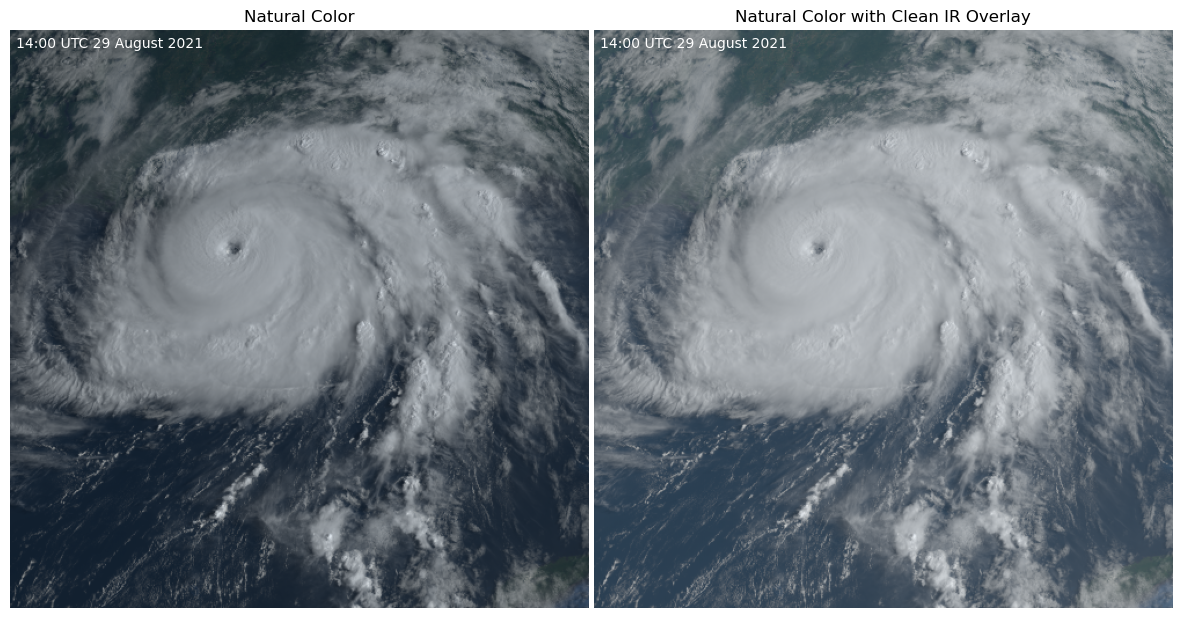

In [15]:
# Get an ABI Dataset
f = fs.open("s3://noaa-goes16/ABI-L2-MCMIPM/2021/241/14/OR_ABI-L2-MCMIPM1-M6_G16_s20212411400278_e20212411400347_c20212411400421.nc")
fdn = xr.open_dataset(f)

nc = fdn.rgb.NaturalColor()
ncIR = fdn.rgb.NaturalColor(night_IR=True, gamma=1.2)

fig, axes = plt.subplots(1, 2, figsize=[15,8], dpi=100)

text = fdn.t.dt.strftime('%H:%M UTC %d %B %Y').item()

axes[0].axis('off')
axes[0].imshow(nc)
axes[0].set_title('Natural Color')
axes[0].text(0.01, .97, text, color='w', transform=axes[0].transAxes)

axes[1].axis('off')
axes[1].imshow(ncIR)
axes[1].set_title('Natural Color with Clean IR Overlay')
axes[1].text(0.01, .97, text, color='w', transform=axes[1].transAxes)

plt.subplots_adjust(wspace=.01)